## MOVING AVERAGE

In [1]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data
df = pd.read_csv('starbucks.csv', parse_dates= True, index_col=0)
df

,price
Date,
2015-01-02,38
2015-01-05,37
2015-01-06,37
2015-01-07,38
2015-01-08,38
...,...
2018-12-24,61
2018-12-26,63
2018-12-27,63


In [3]:
# the simple moving average over a period of 5 
df['SMA_5'] = df.price.rolling(5, min_periods=1).mean()

In [4]:
# the simple moving average over a period of 10 
df['SMA_10'] = df.price.rolling(10, min_periods=1).mean()

In [5]:
df['Error_5']=df['price']-df['SMA_5']

In [6]:
df['Error_10']=df['price']-df['SMA_10']

<AxesSubplot:xlabel='Date'>

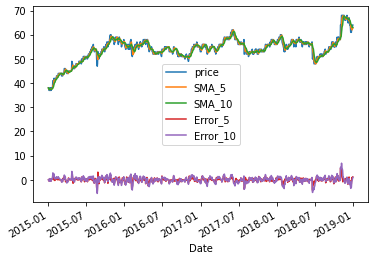

In [7]:
df.plot()

Text(0, 0.5, 'Demand')

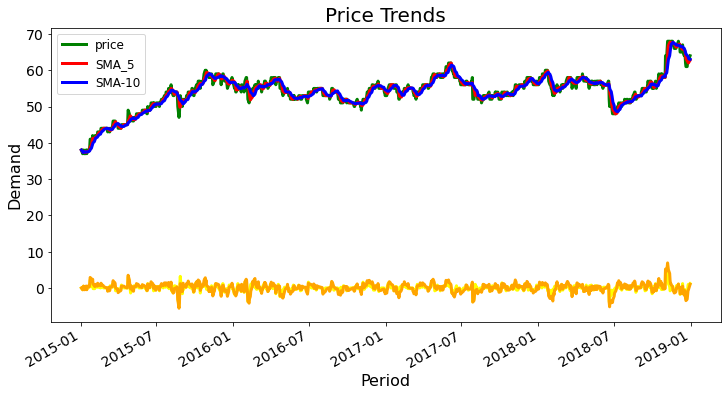

In [8]:
# colors for the line plot
colors = ['green', 'red', 'blue', 'yellow','orange']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['price', 'SMA_5', 'SMA-10'], fontsize=12)

# title and labels
plt.title('Price Trends', fontsize=20)
plt.xlabel('Period', fontsize=16)
plt.ylabel('Demand', fontsize=16)

### KPI for SMA-5

In [9]:
# For KPI Calculation
MAE = df["Error_5"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error_5"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df["Error_10"]**2).mean()
print("MSE:",round(MSE,2))
mae = metrics.mean_absolute_error(df['price'], df['SMA_5'])
mse = metrics.mean_squared_error(df['price'], df['SMA_5'])
rmse = np.sqrt(mse) # or mse**(0.5)  
print(round(mae,2))
print(round(mse,2))
print(round(rmse,2))

MAE: 0.6
RMSE: 0.84
MSE: 1.47
0.6
0.71
0.84


### KPI for SMA-10

In [10]:
# For KPI Calculation
MAE = df["Error_10"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error_10"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df["Error_10"]**2).mean()
print("MSE:",round(MSE,2))
mae = metrics.mean_absolute_error(df['price'], df['SMA_10'])
mse = metrics.mean_squared_error(df['price'], df['SMA_10'])
rmse = np.sqrt(mse) # or mse**(0.5)  
print(round(mae,2))
print(round(mse,2))
print(round(rmse,2))

MAE: 0.89
RMSE: 1.21
MSE: 1.47
0.89
1.47
1.21


## EXPONENTIAL SMOOTHING

In [11]:
df = pd.read_csv('starbucks.csv', index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
df.head()

,price
Date,
1/2/2015,38
1/5/2015,37
1/6/2015,37
1/7/2015,38
1/8/2015,38


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 1/2/2015 to 12/31/2018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1006 non-null   int64
dtypes: int64(1)
memory usage: 15.7+ KB


(994, 1)
(12, 1)


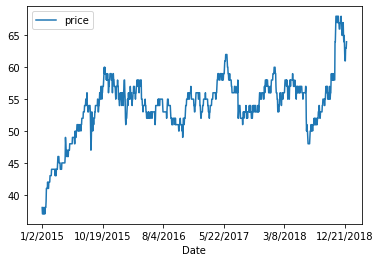

In [14]:
train=df[0:-12] 
test=df[-12:]
print(train.shape)
print(test.shape)
df.plot()
plt.show()

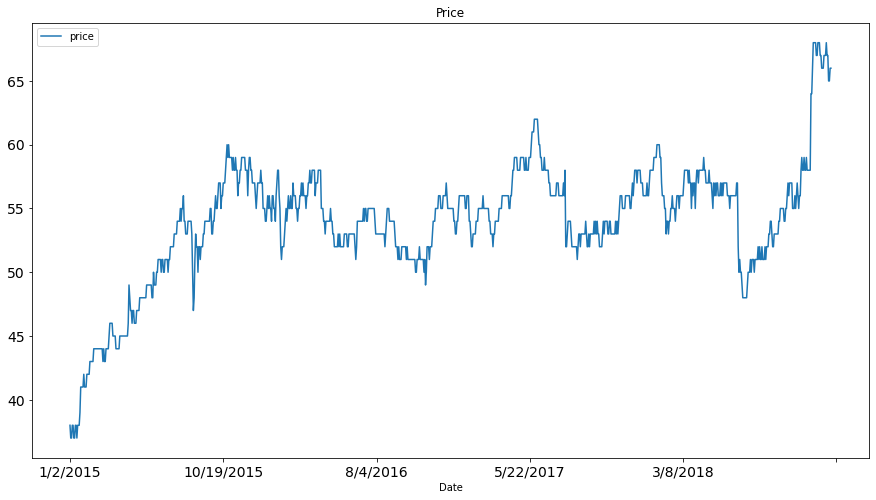

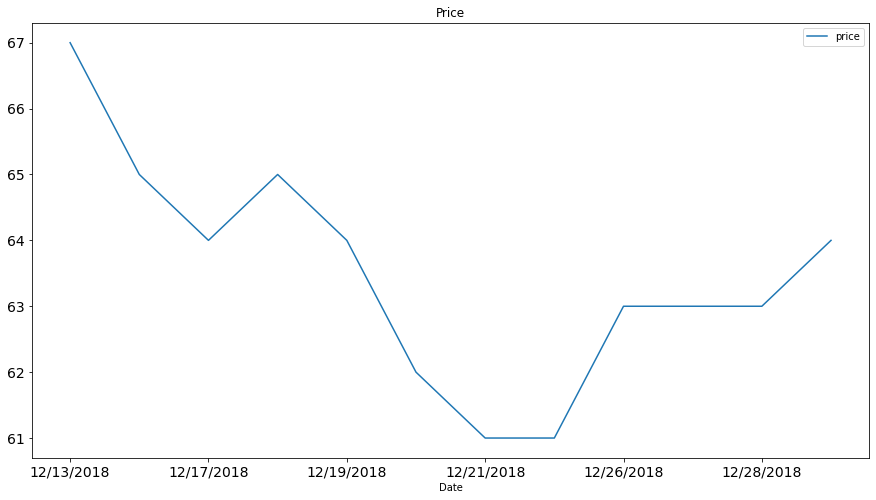

In [15]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Price', fontsize=14)
test.plot(figsize=(15,8), title= 'Price', fontsize=14)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

### Simple Exponential Smoothing

MAE 2.64
MSE 8.82
RMSE 2.97


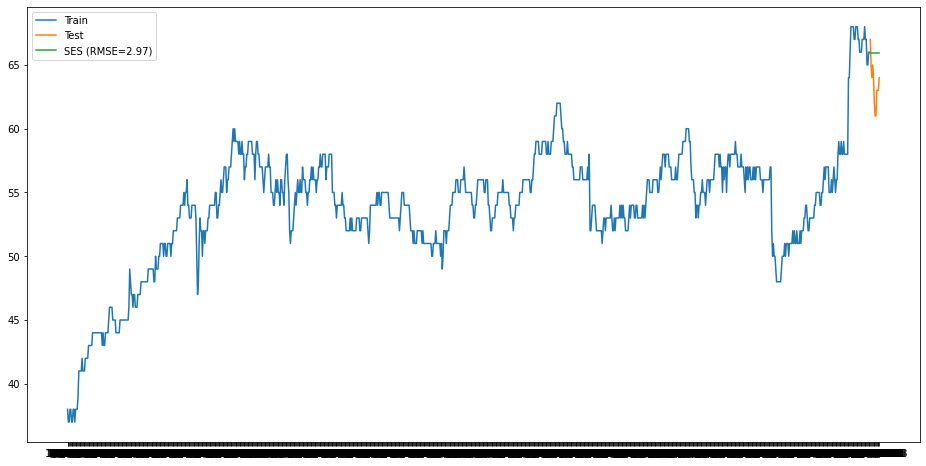

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['price'])).fit(smoothing_level=0.8,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.price, pred.SES)
mse=mean_squared_error(test.price, pred.SES)
rmse = sqrt(mean_squared_error(test.price, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()

In [18]:
pred

,price,SES
Date,,
12/13/2018,67,65.96
12/14/2018,65,65.96
12/17/2018,64,65.96
12/18/2018,65,65.96
12/19/2018,64,65.96
12/20/2018,62,65.96
12/21/2018,61,65.96
12/24/2018,61,65.96
12/26/2018,63,65.96


#### Double Exponential Smoothing (Holt)

MAE 2.44
MSE 7.67
RMSE 2.77


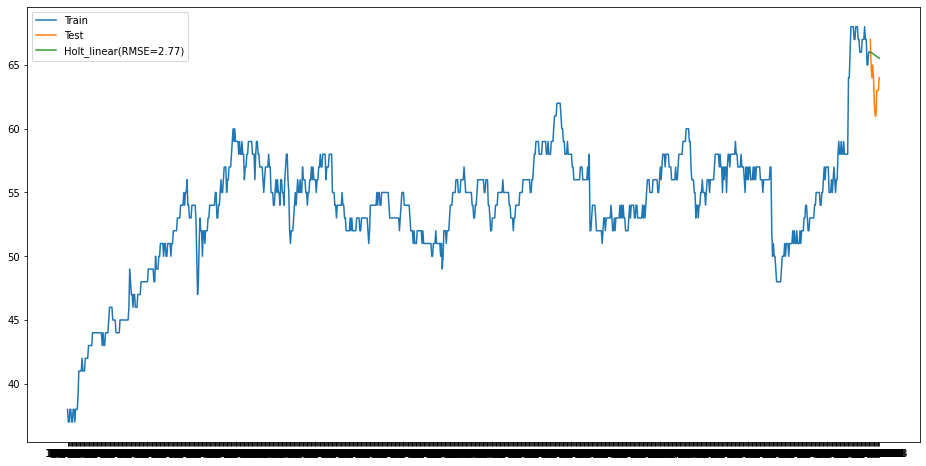

In [19]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.price, pred.Holt_linear)
mse=mean_squared_error(test.price, pred.Holt_linear)
rmse = sqrt(mean_squared_error(test.price, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

In [20]:
pred

,price,Holt_linear
Date,,
12/13/2018,67,66.03
12/14/2018,65,65.98
12/17/2018,64,65.94
12/18/2018,65,65.89
12/19/2018,64,65.85
12/20/2018,62,65.80
12/21/2018,61,65.76
12/24/2018,61,65.71
12/26/2018,63,65.66


## ARIMA Time Series

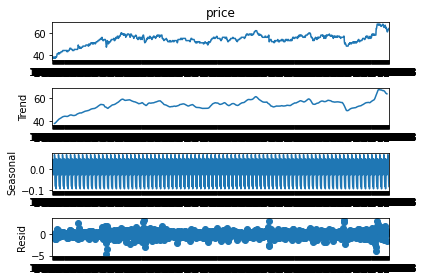

In [21]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['price'], 
                            freq=12)

# Plot decomposition
decomp.plot()
plt.show()

#### Check for Stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Run Dicky-Fuller test
result = adfuller(df['price'])

In [24]:
# Print test statistic
print(result)

(-3.3296398132821654, 0.01360445496077853, 1, 1004, {'1%': -3.436879978012783, '5%': -2.86442302475405, '10%': -2.568305057578451}, 2411.7182426458803)


In [25]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

In [26]:
# Run Dicky-Fuller test
result = adfuller(df_diff['price'])

In [27]:
# Print test statistic
print(result)

(-35.22519034620324, 0.0, 0, 1004, {'1%': -3.436879978012783, '5%': -2.86442302475405, '10%': -2.568305057578451}, 2417.6355272961014)


In [28]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

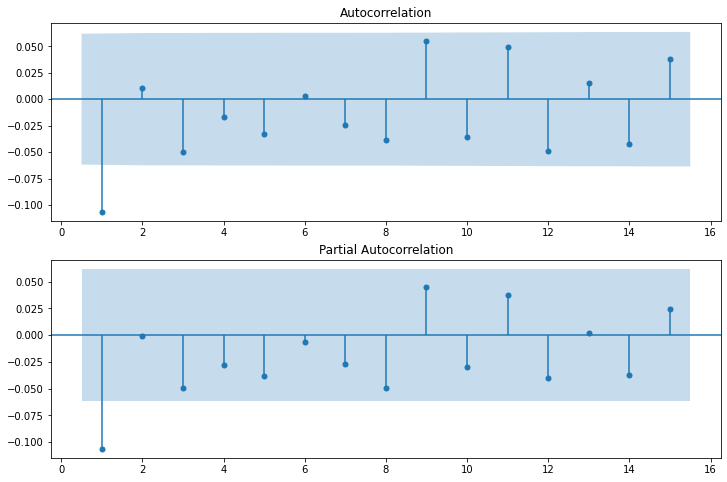

In [29]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

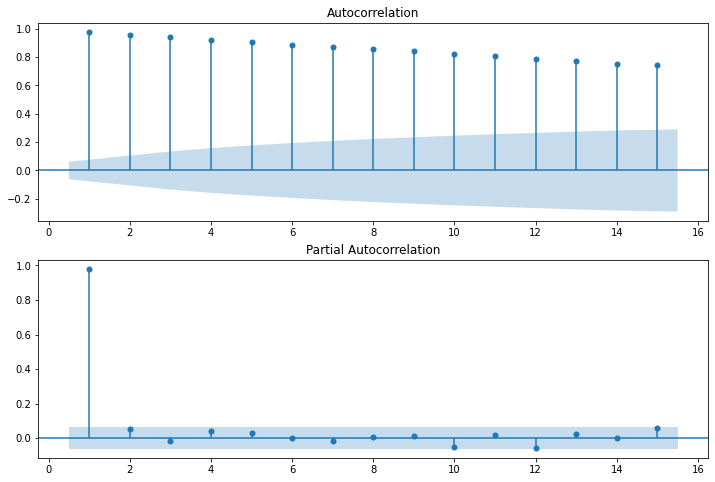

In [30]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

### Generating Predictions

#### Generating One Step Ahead Predictions 

In [31]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Instantiate the model
arma = SARIMAX(df, order=(1,1,2))

/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [32]:
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1006
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1232.927
Date:                Tue, 02 Mar 2021   AIC                           2473.854
Time:                        21:17:28   BIC                           2493.505
Sample:                             0   HQIC                          2481.321
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8120      0.201      4.047      0.000       0.419       1.205
ma.L1         -0.9192      0.203     -4.520      0.000      -1.318      -0.521
ma.L2          0.0589      0.042      1.410      0.1

In [33]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower price']
upper_limits = confidence_intervals.loc[:,'upper price']

# Print best estimate predictions
print(mean_forecast)

Date
12/13/2018   66.01
12/14/2018   66.90
12/17/2018   65.18
12/18/2018   64.16
12/19/2018   64.97
12/20/2018   64.13
12/21/2018   62.28
12/24/2018   61.24
12/26/2018   61.14
12/27/2018   62.90
12/28/2018   63.02
12/31/2018   63.02
Name: predicted_mean, dtype: float64


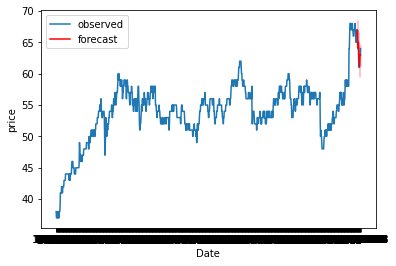

In [34]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

#### Generate Dynamic Predictions

In [35]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower price']
upper_limits = confidence_intervals.loc[:,'upper price']

# Print best estimate predictions
print(mean_forecast)

Date
12/13/2018   66.01
12/14/2018   66.01
12/17/2018   66.02
12/18/2018   66.03
12/19/2018   66.03
12/20/2018   66.03
12/21/2018   66.04
12/24/2018   66.04
12/26/2018   66.04
12/27/2018   66.04
12/28/2018   66.04
12/31/2018   66.05
Name: predicted_mean, dtype: float64


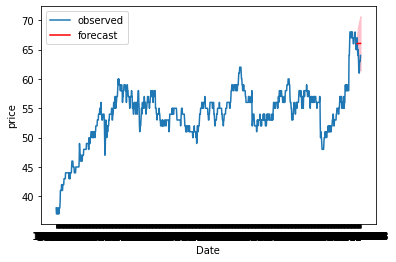

In [36]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

#### Out of the Sample Predictions (12 periods ahead)

In [37]:
forecast = results.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower price']
upper_limits = confidence_intervals.loc[:,'upper price']

# Print best estimate predictions
print(mean_forecast)

1006   63.91
1007   63.90
1008   63.89
1009   63.88
1010   63.88
1011   63.87
1012   63.87
1013   63.86
1014   63.86
1015   63.86
1016   63.86
1017   63.85
Name: predicted_mean, dtype: float64


/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


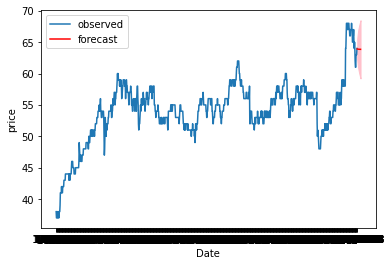

In [38]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()

#### Use the grid search method to calculate the parameter p and q

In [39]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarnin

In [40]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q      AIC      BIC
6  2  0 2,481.65 2,501.30
4  1  1 2,481.76 2,501.41
7  2  1 2,483.53 2,508.10
5  1  2 2,483.73 2,508.29
8  2  2 2,485.04 2,514.52
3  1  0 2,489.71 2,504.45
2  0  2 4,159.34 4,179.00
1  0  1 4,892.18 4,906.92
0  0  0 6,029.94 6,039.77
   p  q      AIC      BIC
6  2  0 2,481.65 2,501.30
4  1  1 2,481.76 2,501.41
3  1  0 2,489.71 2,504.45
7  2  1 2,483.53 2,508.10
5  1  2 2,483.73 2,508.29
8  2  2 2,485.04 2,514.52
2  0  2 4,159.34 4,179.00
1  0  1 4,892.18 4,906.92
0  0  0 6,029.94 6,039.77


#### Based on the results p=1 and q=2 and d=1

In [41]:
# Instantiate the model
arma = SARIMAX(df, order=(1,1,2))

/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sandeepthumula/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [42]:
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1006
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1232.927
Date:                Tue, 02 Mar 2021   AIC                           2473.854
Time:                        21:19:20   BIC                           2493.505
Sample:                             0   HQIC                          2481.321
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8120      0.201      4.047      0.000       0.419       1.205
ma.L1         -0.9192      0.203     -4.520      0.000      -1.318      -0.521
ma.L2          0.0589      0.042      1.410      0.1

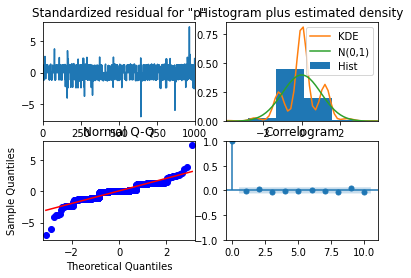

In [43]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

## Linear regression

In [44]:
import statsmodels.api as sm

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sp

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.256e+29
Date:                Tue, 02 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:19:53   Log-Likelihood:                 28020.
No. Observations:                1006   AIC:                        -5.604e+04
Df Residuals:                    1004   BIC:                        -5.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.411e-13   6.86e-14     -3.513      0.0

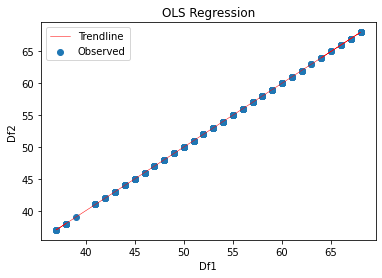

In [46]:
X = sm.add_constant(df['price'])
model = sm.OLS(df['price'],X)
results = model.fit()
plt.scatter(df['price'],df['price'],alpha=1.0,label= 'Observed')
y_predict = results.params[0] + results.params[1]*df['price']
plt.plot(df['price'],y_predict, linewidth=0.5,color = 'r',label= 'Trendline')
plt.legend()
plt.xlabel('Df1')
plt.ylabel('Df2')
plt.title('OLS Regression')
print(results.summary()) 

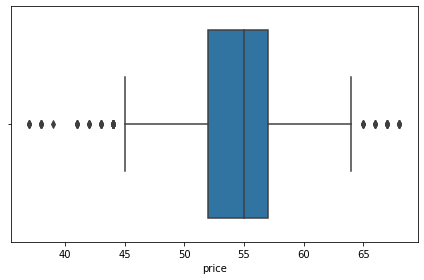

In [47]:
# Outlier Analysis
df= pd.read_csv('starbucks.csv', parse_dates=True, index_col =0)
plt1 = sns.boxplot(df['price'])
plt.tight_layout()
# There are no considerable outliers present in the data.

<AxesSubplot:xlabel='price', ylabel='Density'>

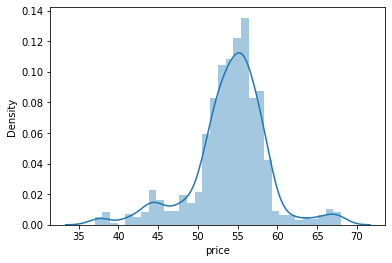

In [48]:
sns.distplot(df['price'], kde=True)

In [49]:
y=np.array(df['price'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(df['price'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.573011053115831 
 p =  7.420340561530343e-89 
 s =  3.4391996021860253e-18


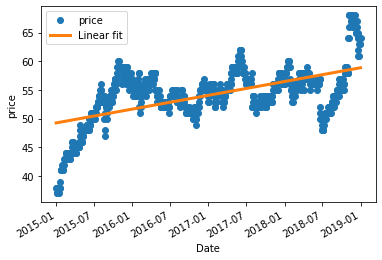

In [50]:
f, ax = plt.subplots(1, 1)
df['price'].dropna().plot(ax=ax,marker='o', ls='')
ax.plot(xf1, yf,label='Linear fit', lw=3)
plt.ylabel('price')
ax.legend();